# Analysis 3

Importing Packages

In [17]:
import pandas
import json
import csv
import urllib
import nltk
import operator
import os
import seaborn

Declaring constants

In [3]:
lmtzr = nltk.stem.wordnet.WordNetLemmatizer()
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
rootdir = "C:/Users/Ankit Mahajan/Documents/Github/mahajan_ankit/final project/"

Retrieving data

In [4]:
df = pandas.read_csv(rootdir+'/data/processed data/IRS_Data.csv', sep=",", usecols=['n1','a00100','year'])

Grouping the data for every year

In [5]:
df = df.groupby("year", as_index=False).sum()

Calculating income for every year

In [6]:
df['average_income'] = pandas.Series(data = df.a00100/df.n1, index=df.index)

Calculating change in every year

In [7]:
df['change_percentage'] = df.average_income.pct_change()

Visualization

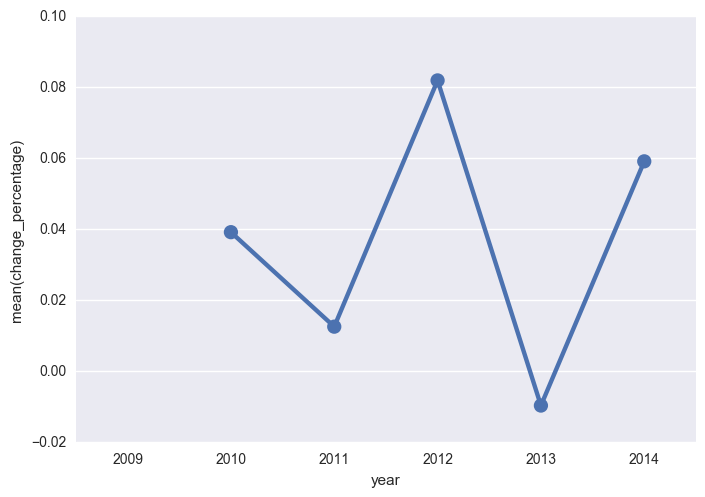

In [10]:
g=seaborn.pointplot(x="year", y="change_percentage", data=df)
seaborn.plt.show()

In [12]:
g.figure.savefig("./Analysis3 output/graph.png")

Reading news

In [23]:
def readdata(uri):
    with urllib.request.urlopen(uri) as url:
        data = json.loads(url.read().decode())
    return data

Using nltk to extract oonly useful words

In [24]:
def process(data):
    for d in data["response"]["docs"]:
        for f in d:
            if d[f] is not None:
                for k in nltk.pos_tag(tokenizer.tokenize(d[f].lower())):
                #escaping stopwords
                    if k[0] in nltk.corpus.stopwords.words():
                        continue
                    #Counting only nouns and verbs and storing them in a dictionary
                    elif k[1] in ['NN','JJ','RB','VB']:
                        if k[0] in datatoanalyse:
                            datatoanalyse[lmtzr.lemmatize(k[0])] +=1
                        else:
                            datatoanalyse[lmtzr.lemmatize(k[0])] = 1

Executing the functions

In [25]:
datatoanalyse = {}
for y in df.year:
    if df.change_percentage[df.year == y] is None:
        continue
    else:
        uri="https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=eaf7e9522bd346d49024f720b1e4c8c7&q=gdp,gross,domestic,U.S&begin_date="+str(y-1)+"0101&end_date="+str(y)+"0101&fl=snippet,lead_paragraph,abstract"
        process(readdata(uri));

Sorting words with occurence iin the articles

In [26]:
freq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)
freq

[('quarter', 22),
 ('economic', 17),
 ('growth', 16),
 ('second', 16),
 ('federal', 12),
 ('june', 9),
 ('haiti', 8),
 ('recent', 8),
 ('reserve', 8),
 ('new', 8),
 ('committee', 6),
 ('lesson', 6),
 ('sharply', 6),
 ('back', 6),
 ('post', 5),
 ('nation', 5),
 ('country', 5),
 ('community', 5),
 ('help', 5),
 ('different', 5),
 ('global', 5),
 ('financial', 5),
 ('following', 5),
 ('decade', 5),
 ('budget', 5),
 ('plan', 5),
 ('earthquake', 5),
 ('right', 5),
 ('unlikely', 4),
 ('bank', 4),
 ('record', 4),
 ('staff', 4),
 ('christopher', 4),
 ('weigh', 4),
 ('first', 4),
 ('auto', 4),
 ('pace', 4),
 ('probably', 4),
 ('recession', 4),
 ('united', 4),
 ('gross', 4),
 ('market', 4),
 ('year', 4),
 ('flat', 4),
 ('culture', 4),
 ('national', 4),
 ('bond', 4),
 ('education', 4),
 ('start', 4),
 ('increase', 4),
 ('open', 4),
 ('change', 4),
 ('sector', 4),
 ('disaster', 3),
 ('economy', 3),
 ('president', 3),
 ('much', 3),
 ('school', 3),
 ('european', 3),
 ('information', 3),
 ('domestic'

In [27]:
df = pandas.DataFrame(freq)

In [28]:
df.to_csv("./Analysis3 output/reason analysis.csv")